# PCA and Beyesian
Franklin Ma    <a href='mailto:franklin.ma@berkeley.edu'>franklin.ma@berkeley.edu</a>

**Contact**       
 
**Data Application Lab** | <a href='http://datalaus.com' target='_blank'>www.datalaus.com</a>

**Contact us** | <a href='mailto:info@datalaus.com'>info@datalaus.com</a>   

**Office phone** | 1-(800)-485-7918

## Principal Component Analysis

**After this session, you can ask interview questions like:**   
1. What's the difference between PCA and Linear Regression?
2. When do we need PCA?   
3. What kind of data do we need before PCA?
4. How to explain the result in PCA? What does **COMPONENT** mean? What does eigenvector mean?
5. What does the PCA result should look like? Why they have difference? 
    1. S&P500   
    2. A portfolio contains 6 assets from US, UK, China, Brazil, Russian, and India
    3. A portfolio contains 5 factors: Momentum, Value, Beta, Size, Price-Earnings Ratio (**factor model**)
6. Can you provide some dimension reduction method?
7. What's the difference between PCA and factor model

**After this session, what you can put on your resume is like:   **
1. PCA in stock market and factor model in Russell 2000

In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
from sklearn.decomposition import KernelPCA

C:\Users\Franklin Ma\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


### DAX Index and its 30 Stocks

In [2]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [3]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']
data = data.dropna()

Wall time: 7.13 s


In [4]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [5]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2010-01-04,38.505,88.54,44.850,56.40,46.445,32.050
2010-01-05,39.720,88.81,44.170,55.37,46.200,32.310
2010-01-06,39.400,89.50,44.450,55.02,46.165,32.810
2010-01-07,39.745,88.47,44.155,54.30,45.700,33.100
2010-01-08,39.600,87.99,44.020,53.82,44.380,32.655


### Applying PCA

In [6]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [7]:
pca = KernelPCA().fit(data.apply(scale_function))

In [8]:
len(pca.lambdas_)

878

In [9]:
pca.lambdas_[:10].round()

array([ 32975.,   5964.,   5405.,   2520.,   1990.,    872.,    729.,
          524.,    304.,    212.])

In [10]:
get_we = lambda x: x / x.sum()

In [11]:
get_we(pca.lambdas_)[:10]

array([ 0.62882054,  0.11372162,  0.10307885,  0.04805489,  0.03794273,
        0.01663267,  0.01389357,  0.00999409,  0.00579426,  0.00403689])

In [12]:
get_we(pca.lambdas_)[:5].sum()


0.9316186374902492

### Constructing a PCA Index

In [13]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

In [14]:
?pca.transform

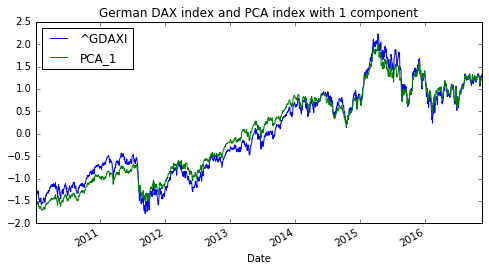

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4), title = "German DAX index and PCA index with 1 component")
# tag: pca_1
# title: German DAX index and PCA index with 1 component
plt.show()

In [16]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

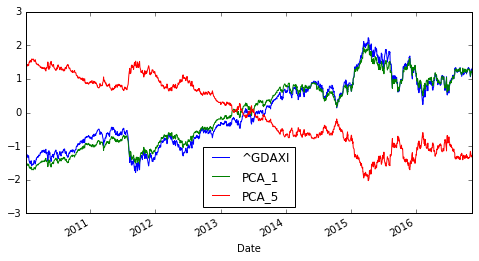

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_2
# title: German DAX index and PCA indices with 1 and 5 components
plt.show()

In [18]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 733776.,  733777.,  733778., ...,  736279.,  736282.,  736283.])

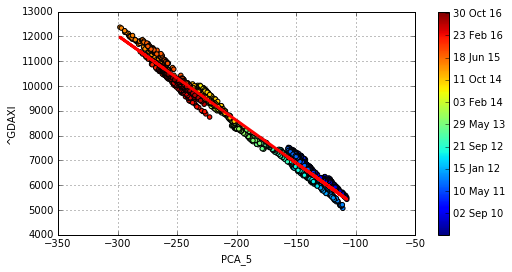

In [19]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_3
# title: DAX return values against PCA return values with linear regression

In [20]:
cut_date = '2011/7/1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

In [21]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)

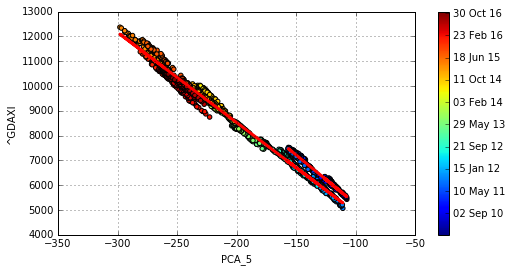

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_7
# title: DAX index values against PCA index values with early and late regression (regime switch)

## Bayesian Regression

**After this session, you can ask interview questions like:**   
1. Can you tell me the intuition of Beyesian method?
2. What is Black-Litterman Model?
3. Monte Hall Problem. 1 car and 2 goats behind 3 doors. Open 1 and host will show you a door with a goat behind. 
4. 1000 coin with a 1 unfair 2-head coin in. Toss a coin 10 times and 10-time head. Prob of unfair coin. 
5. Travel to Seatlle tmr, 3 friends live there. How can you know whether rain tmr?

**After this session, what you can put on your resume is like:   **
1. Bayesian Regression and Beyesian method

### PyMC3

In [23]:
import warnings
warnings.simplefilter('ignore')
import pymc as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
%matplotlib inline

### Introductory Example

In [24]:
`x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

SyntaxError: invalid syntax (<ipython-input-24-768fccb14be0>, line 1)

In [ ]:
reg = np.polyfit(x, y, 1)
  # linear regression

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
# tag: pm_fig_0
# title: Sample data points a regresion line
# size: 90

In [ ]:
reg

In [ ]:
with pm.Model() as model: 
        # model specifications in PyMC3
        # are wrapped in a with-statement
    # define priors
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # define linear regression
    y_est = alpha + beta * x
    
    # define likelihood
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # inference
    start = pm.find_MAP()
      # find starting value by optimization
    step = pm.NUTS(state=start)
      # instantiate MCMC sampling algorithm
    trace = pm.sample(100, step, start=start, progressbar=False)
      # draw 100 posterior samples using NUTS sampling

In [ ]:
trace[0]

In [ ]:
fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
plt.figure(figsize=(8, 8))
# tag: pm_fig_1
# title: Trace plots for alpha, beta and sigma
# size: 90

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)
# tag: pm_fig_2
# title: Sample data and regression lines from Bayesian regression
# size: 90

### Real Data

In [ ]:
import warnings
warnings.simplefilter('ignore')
import zipline
import pytz
import datetime as dt

In [ ]:
data = zipline.data.load_from_yahoo(stocks=['GLD', 'GDX'], 
         end=dt.datetime(2014, 3, 15, 0, 0, 0, 0, pytz.utc)).dropna()
data.info()

In [ ]:
data.plot(figsize=(8, 4))
# tag: zip_fig_1
# title: Co-movements of traiding pair
# size: 90

In [ ]:
data.ix[-1] / data.ix[0] - 1

In [ ]:
data.corr()

In [ ]:
data.index

In [ ]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_2
# title: Scatter plot of prices for GLD and GDX
# size: 90

In [ ]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    y_est = alpha + beta * data['GDX'].values
    
    likelihood = pm.Normal('GLD', mu=y_est, sd=sigma,
                           observed=data['GLD'].values)
    
    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace = pm.sample(100, step, start=start, progressbar=False)

In [ ]:
fig = pm.traceplot(trace)
plt.figure(figsize=(8, 8))
# tag: zip_fig_3
# title: Trace plots for alpha, beta and sigma based on GDX and GLD data
# size: 90

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace)):
    plt.plot(data['GDX'], trace['alpha'][i] + trace['beta'][i] * data['GDX'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_4
# title: Scatter plot with "simple" regression lines
# size: 90

In [ ]:
model_randomwalk = pm.Model()
with model_randomwalk:
    # std of random walk best sampled in log space
    sigma_alpha, log_sigma_alpha = \
            model_randomwalk.TransformedVar('sigma_alpha', 
                            pm.Exponential.dist(1. / .02, testval=.1), 
                            pm.logtransform)
    sigma_beta, log_sigma_beta = \
            model_randomwalk.TransformedVar('sigma_beta', 
                            pm.Exponential.dist(1. / .02, testval=.1),
                            pm.logtransform)

In [ ]:
from pymc.distributions.timeseries import GaussianRandomWalk
# to make the model more simple, we will apply the same coefficients
# to 50 data points at a time
subsample_alpha = 50
subsample_beta = 50

with model_randomwalk:
    alpha = GaussianRandomWalk('alpha', sigma_alpha**-2, 
                               shape=len(data) / subsample_alpha)
    beta = GaussianRandomWalk('beta', sigma_beta**-2, 
                              shape=len(data) / subsample_beta)
    
    # make coefficients have the same length as prices
    alpha_r = np.repeat(alpha, subsample_alpha)
    beta_r = np.repeat(beta, subsample_beta)

In [ ]:
len(data.dropna().GDX.values)  # a bit longer than 1,950

In [ ]:
with model_randomwalk:
    # define regression
    regression = alpha_r + beta_r * data.GDX.values[:1950]
    
    # assume prices are normally distributed,
    # the mean comes from the regression
    sd = pm.Uniform('sd', 0, 20)
    likelihood = pm.Normal('GLD', 
                           mu=regression, 
                           sd=sd, 
                           observed=data.GLD.values[:1950])

In [ ]:
import scipy.optimize as sco
with model_randomwalk:
    # first optimize random walk
    start = pm.find_MAP(vars=[alpha, beta], fmin=sco.fmin_l_bfgs_b)
    
    # sampling
    step = pm.NUTS(scaling=start)
    trace_rw = pm.sample(100, step, start=start, progressbar=False)

In [ ]:
np.shape(trace_rw['alpha'])

In [ ]:
part_dates = np.linspace(min(mpl_dates), max(mpl_dates), 39)

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(part_dates, np.mean(trace_rw['alpha'], axis=0),
         'b', lw=2.5, label='alpha')
for i in range(45, 55):
    plt.plot(part_dates, trace_rw['alpha'][i], 'b-.', lw=0.75)
plt.xlabel('date')
plt.ylabel('alpha')
plt.axis('tight')
plt.grid(True)
plt.legend(loc=2)
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d %b %y') )
ax2 = ax1.twinx()
plt.plot(part_dates, np.mean(trace_rw['beta'], axis=0),
         'r', lw=2.5, label='beta')
for i in range(45, 55):
    plt.plot(part_dates, trace_rw['beta'][i], 'r-.', lw=0.75)
plt.ylabel('beta')
plt.legend(loc=4)
fig.autofmt_xdate()
# tag: zip_fig_5
# title: Evolution of (mean) alpha and (mean) beta over time (updated estimates over time)
# size: 90

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
x = np.linspace(min(data['GDX']), max(data['GDX'])) 
for i in range(39):
    alpha_rw = np.mean(trace_rw['alpha'].T[i])
    beta_rw = np.mean(trace_rw['beta'].T[i]) 
    plt.plot(x, alpha_rw + beta_rw * x, color=plt.cm.jet(256 * i / 39))
# tag: zip_fig_6
# title: Scatter plot with time-dependent regression lines (updated estimates)
# size: 90